In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, r2_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv('/content/cancer patient data sets.csv')

In [ ]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [ ]:
data["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

<ipython-input-64-1bcad76a33a5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
<ipython-input-64-1bcad76a33a5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=

In [ ]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


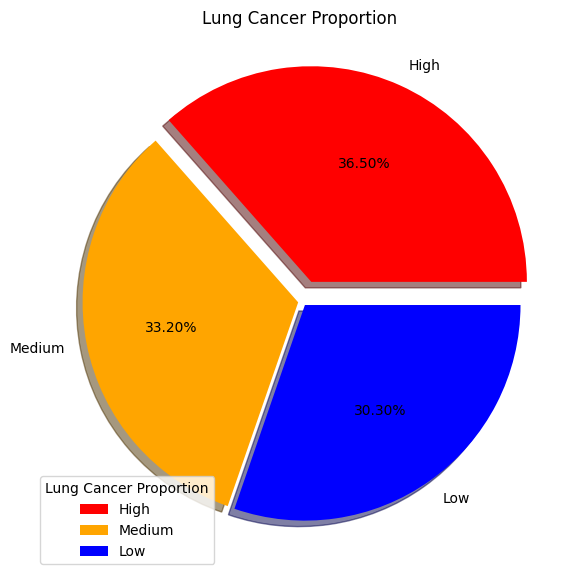

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,7))
colors = ['red', 'orange', 'blue']
plt.title("Lung Cancer Proportion ")
plt.pie(data['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], shadow=True,autopct = "%1.2f%%", colors = colors)
plt.legend(title = "Lung Cancer Proportion", loc = "lower left")
plt.show()
plt.savefig('Lung Cancer Proportion.png')

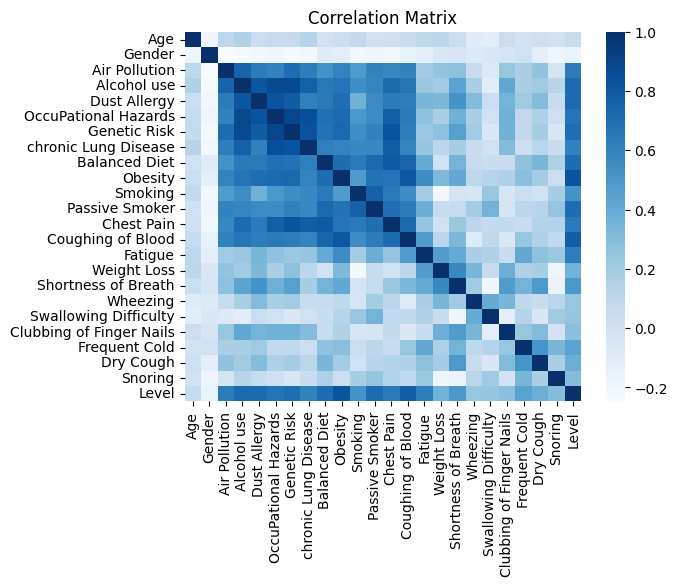

In [ ]:
dataCorr=data.corr()
plt.title("Correlation Matrix")
sns.heatmap(dataCorr, cmap='Blues')
plt.show()

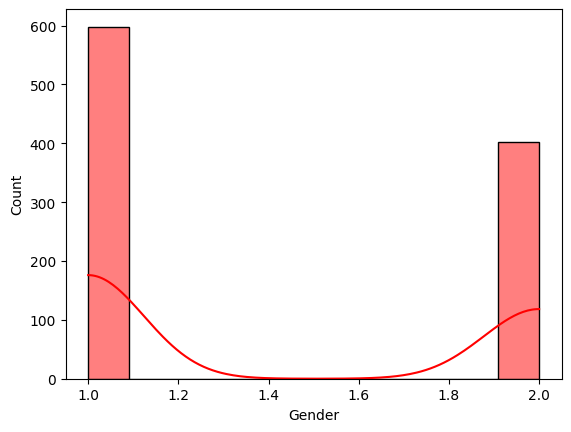

In [ ]:
sns.histplot(data['Gender'], kde=True, color = 'red')
plt.show()

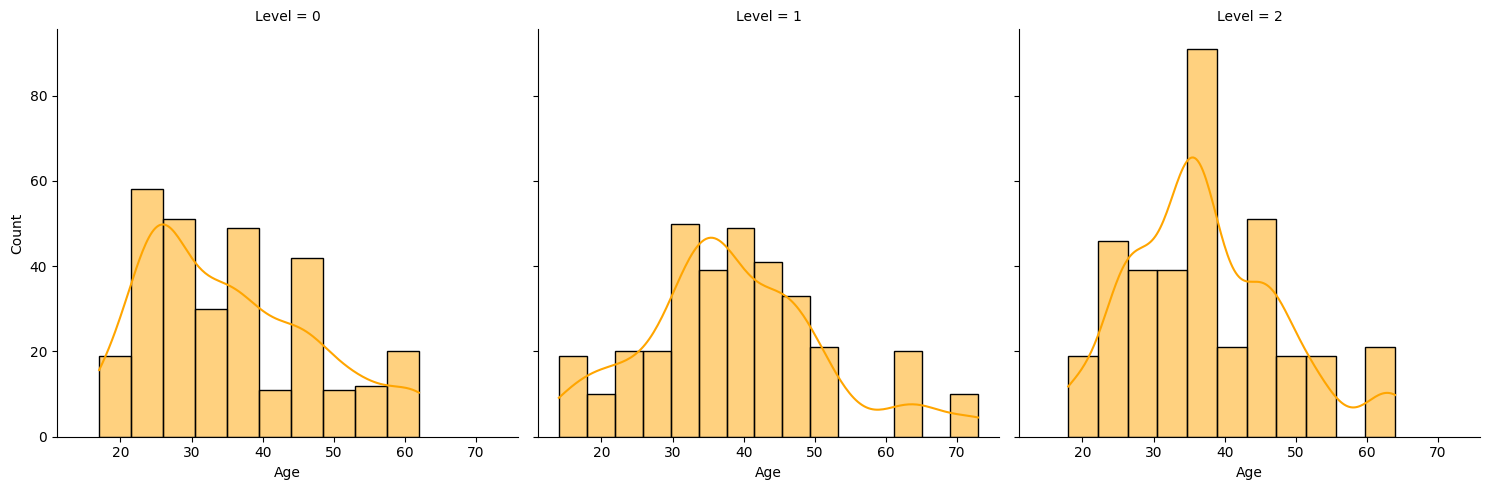

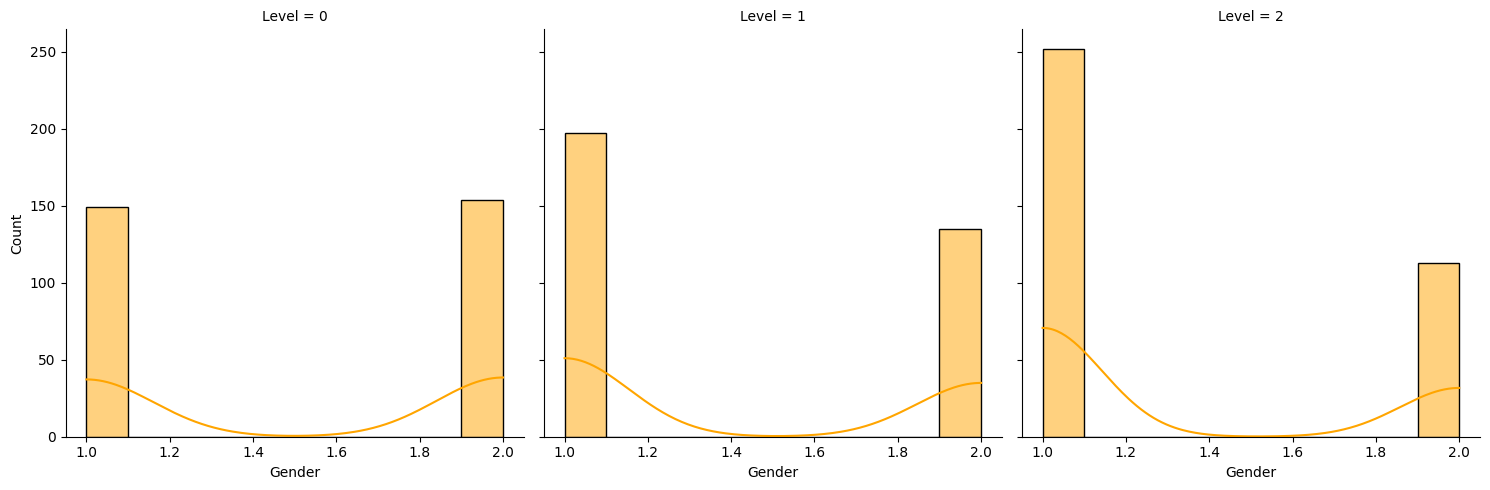

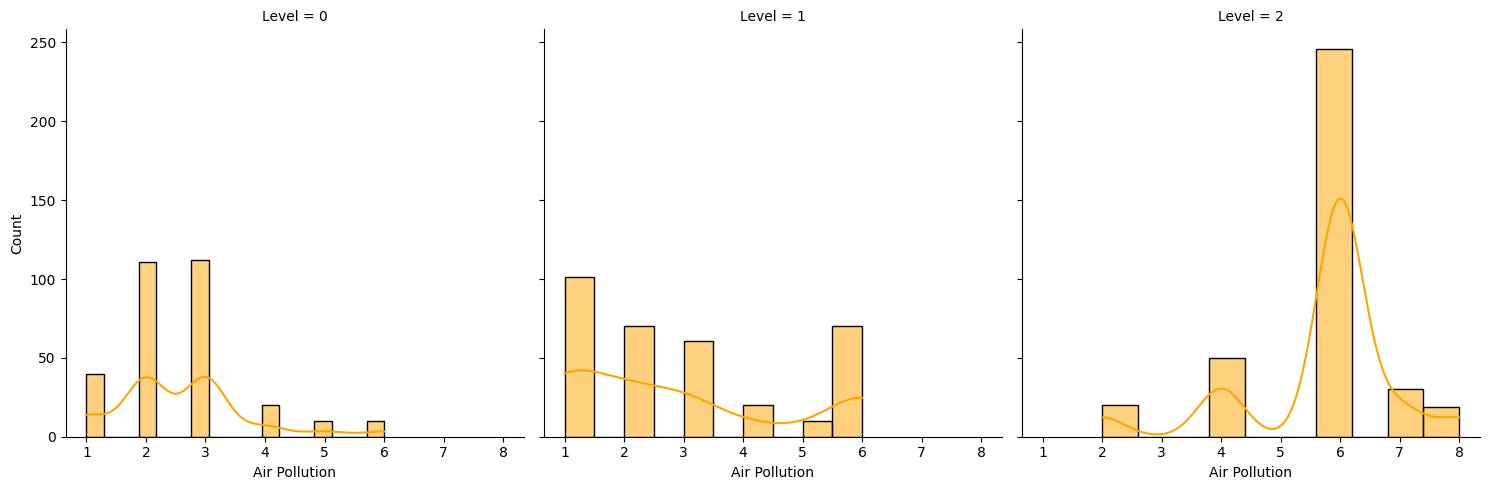

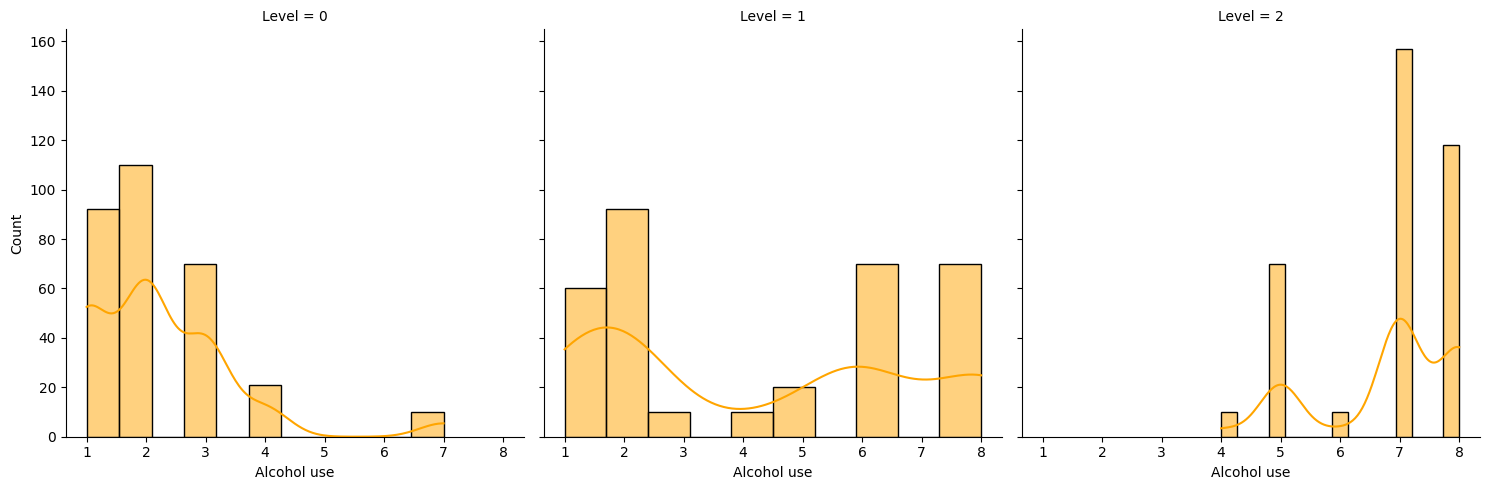

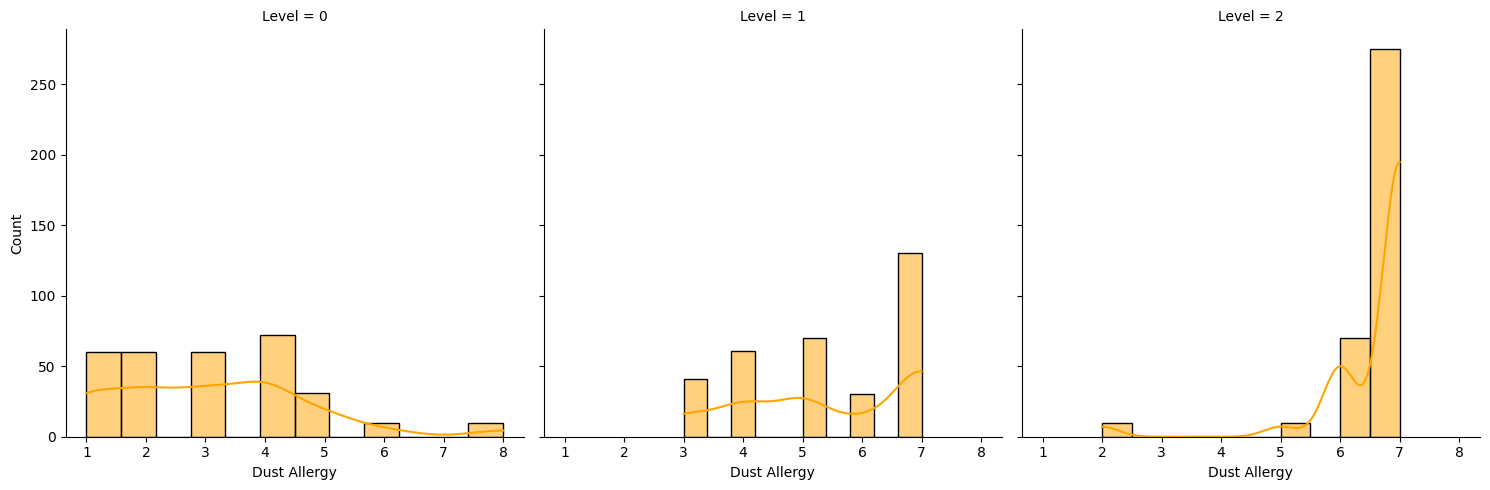

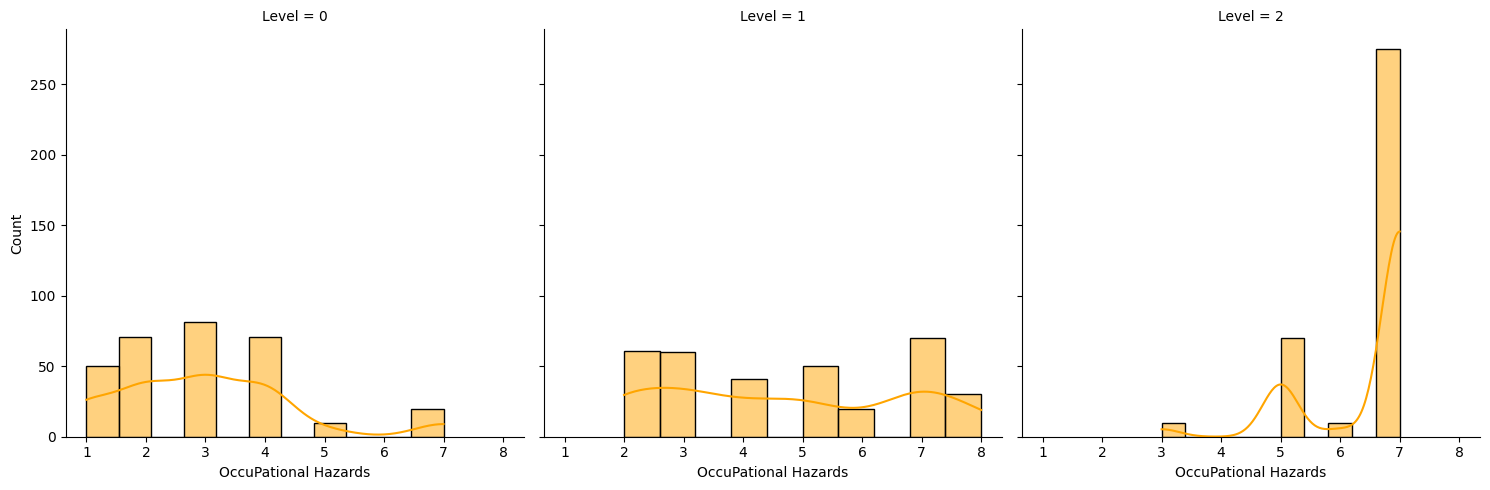

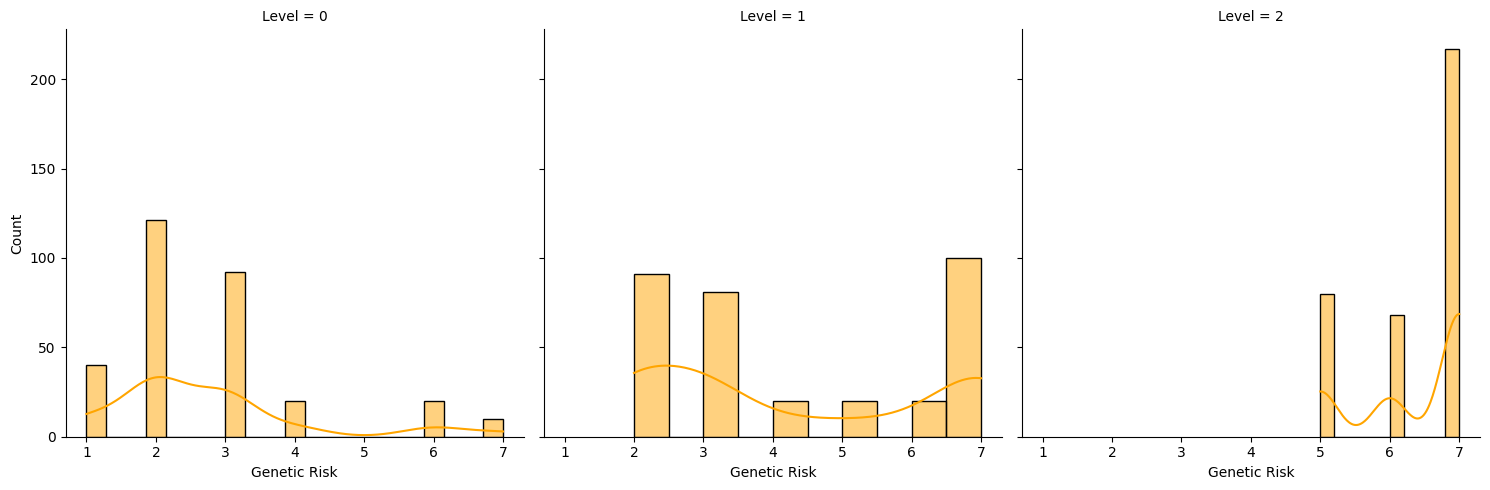

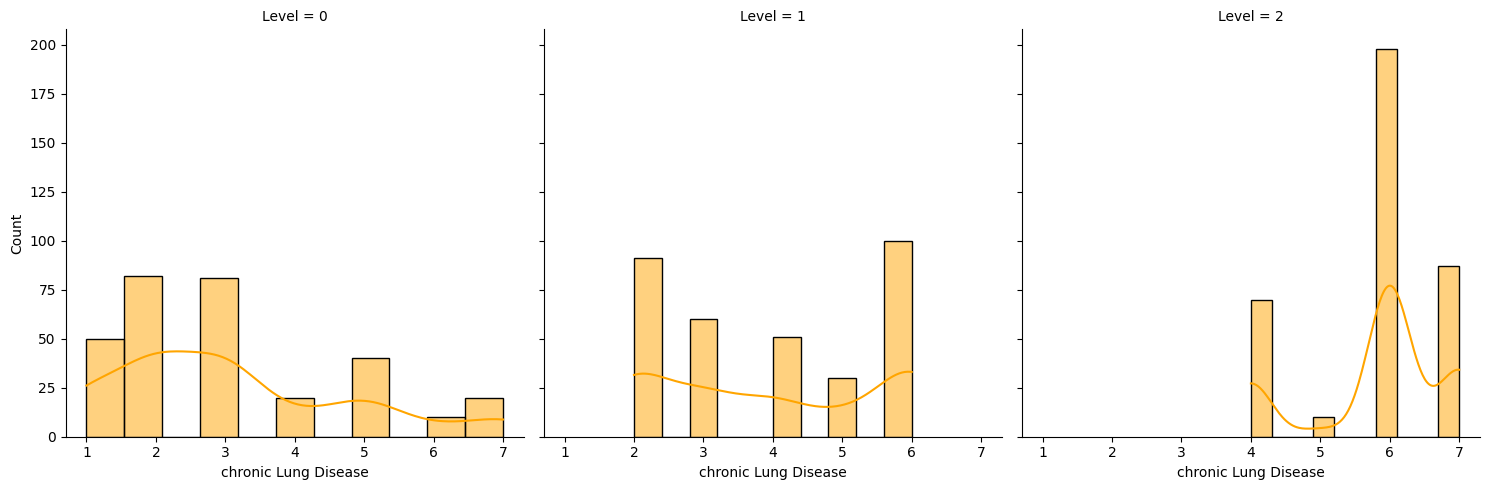

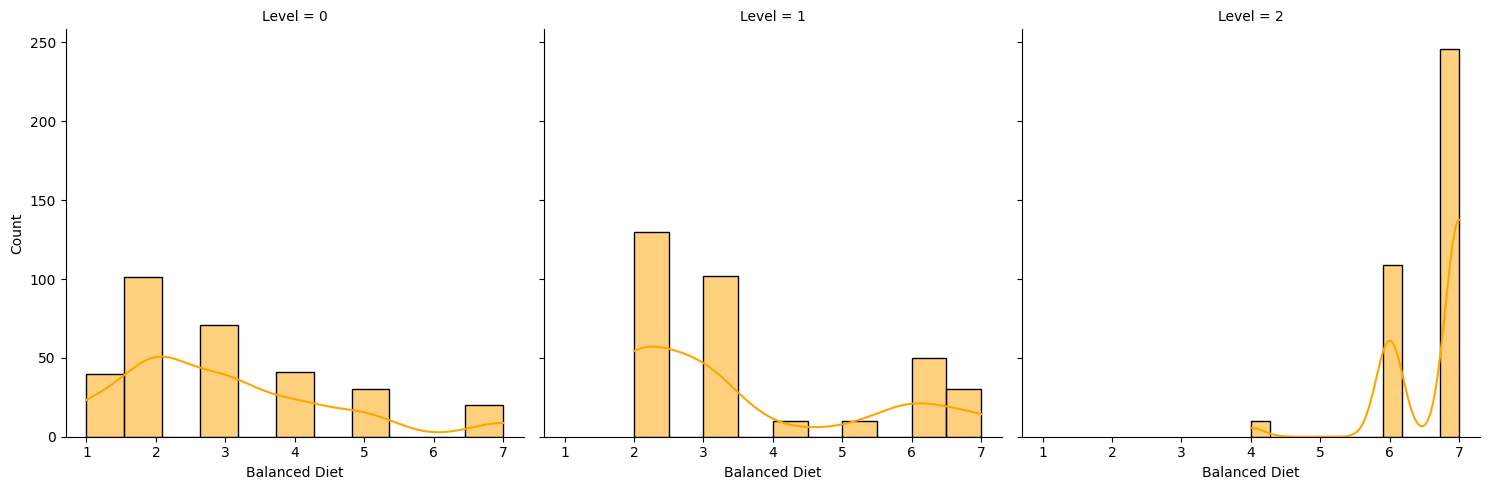

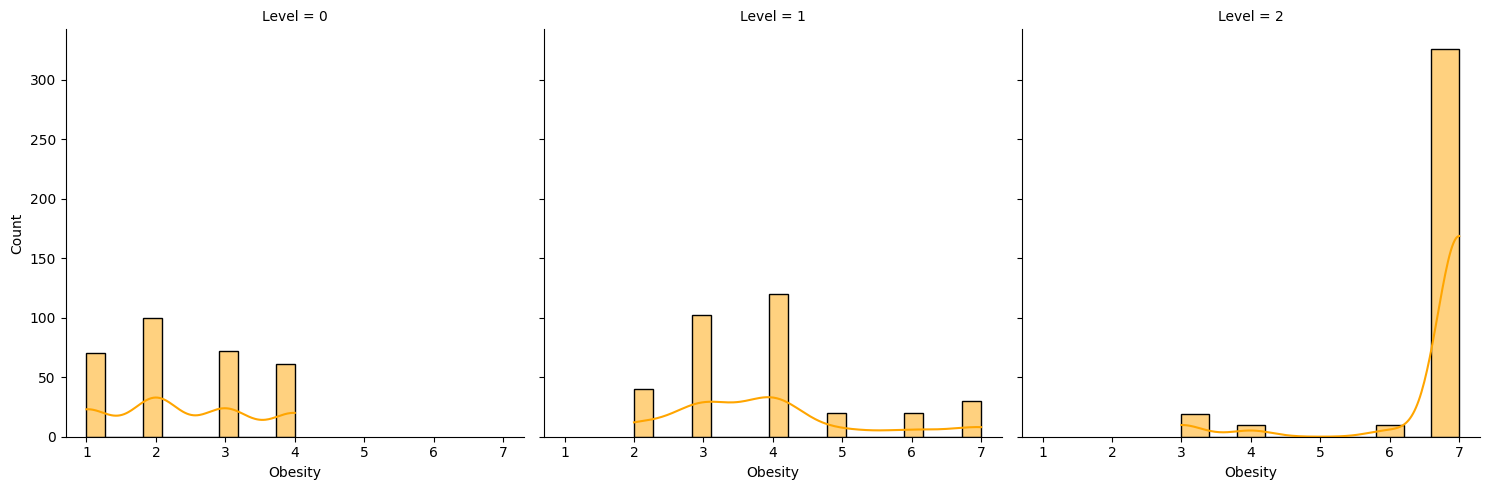

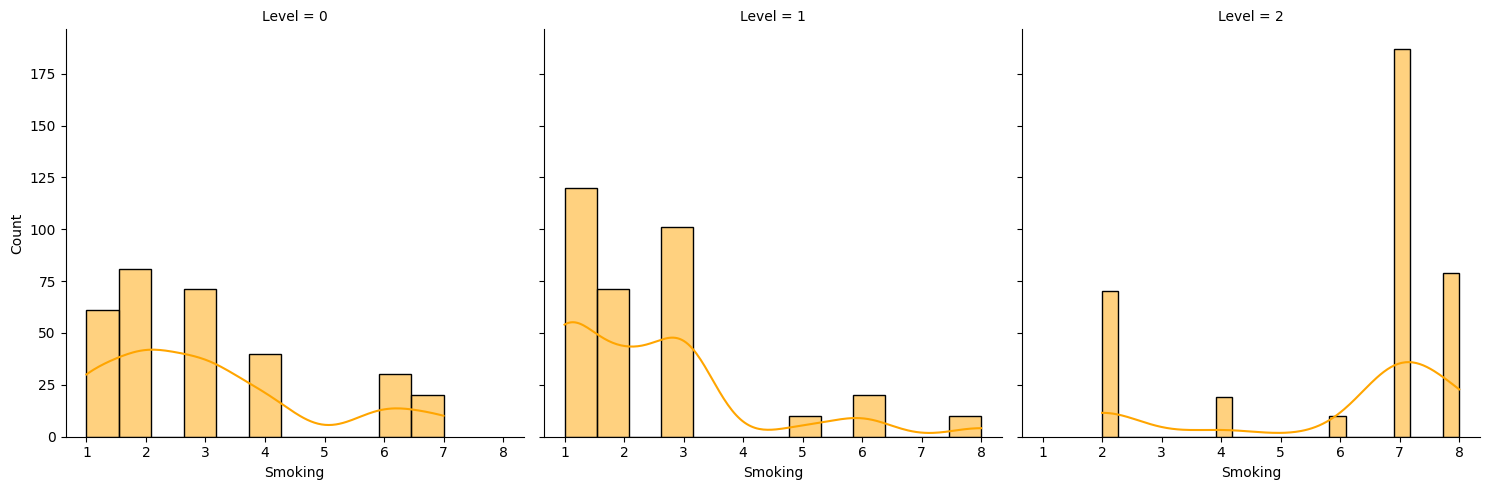

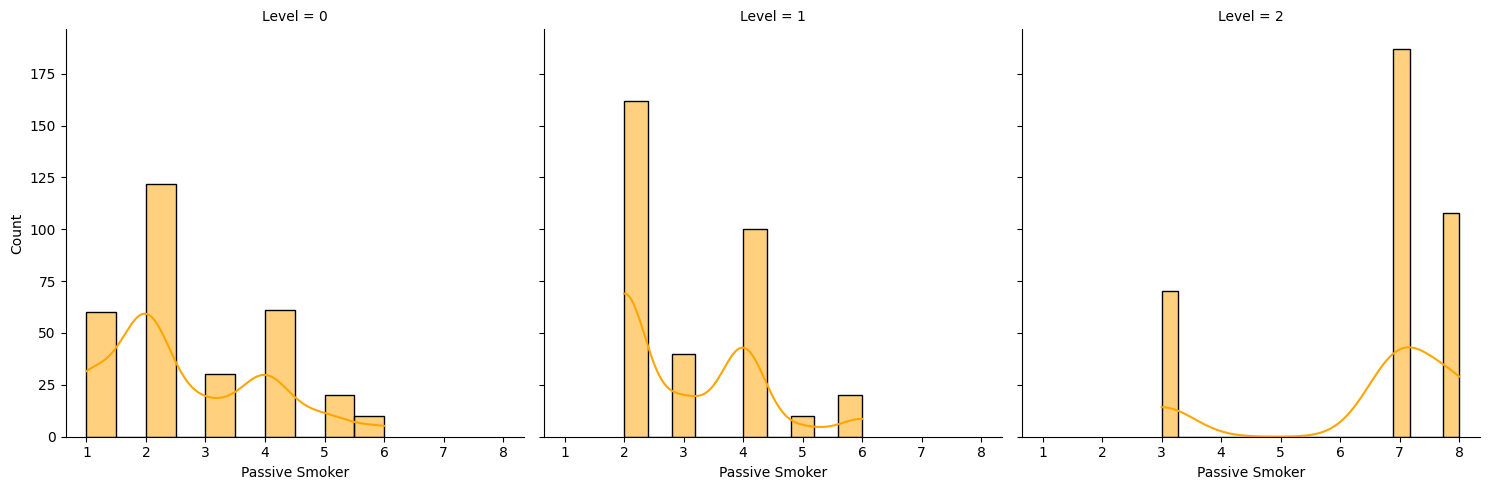

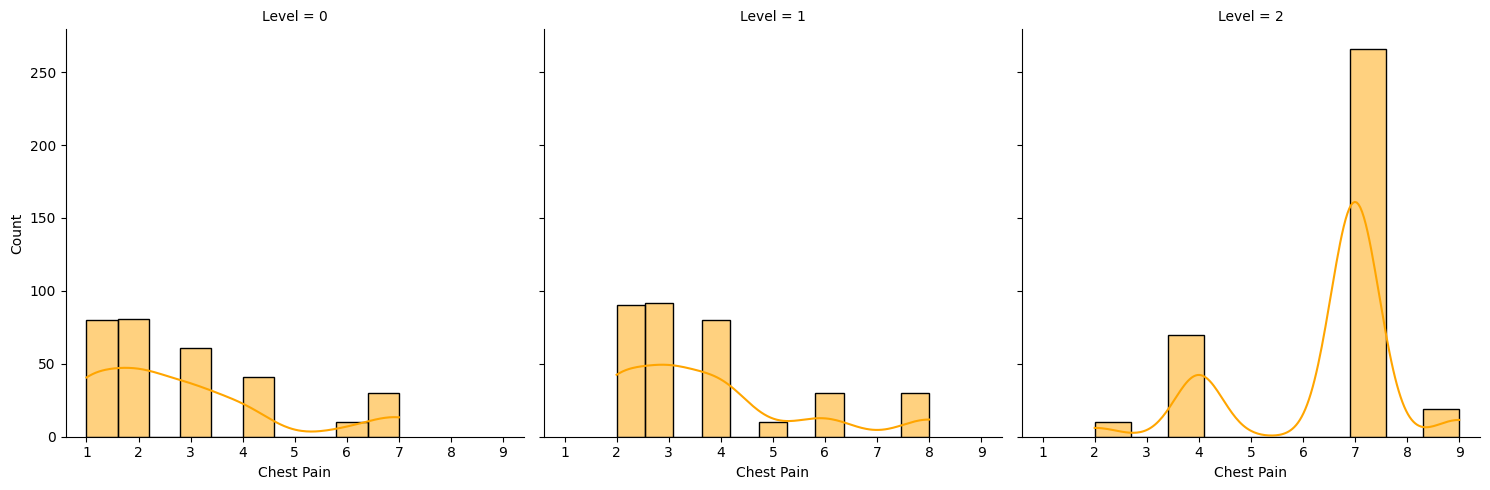

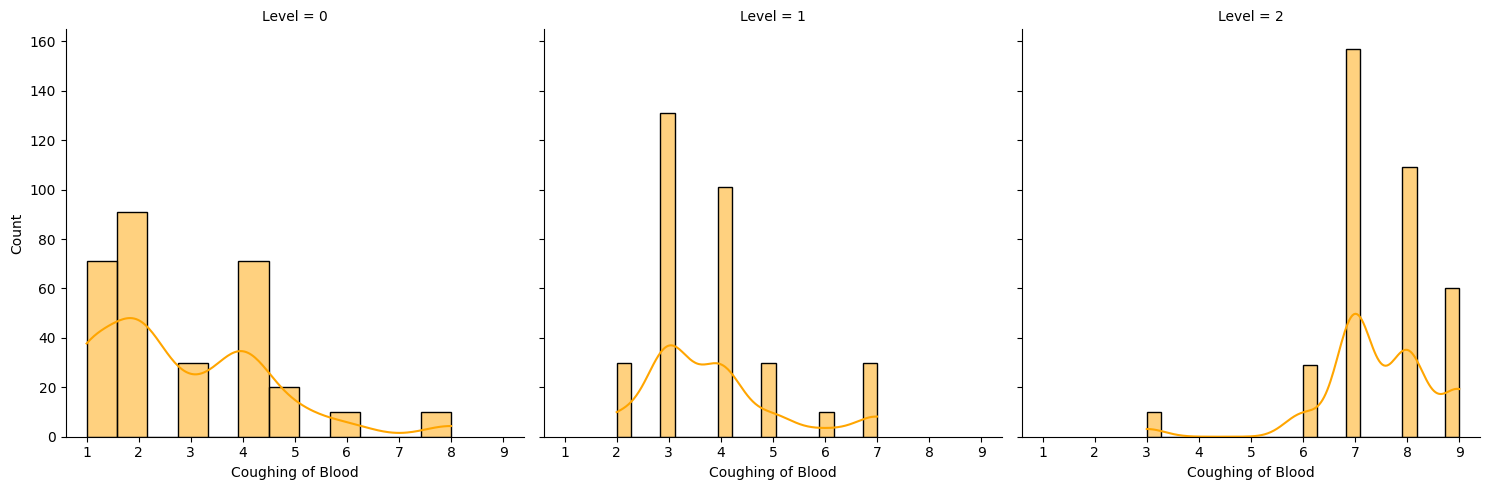

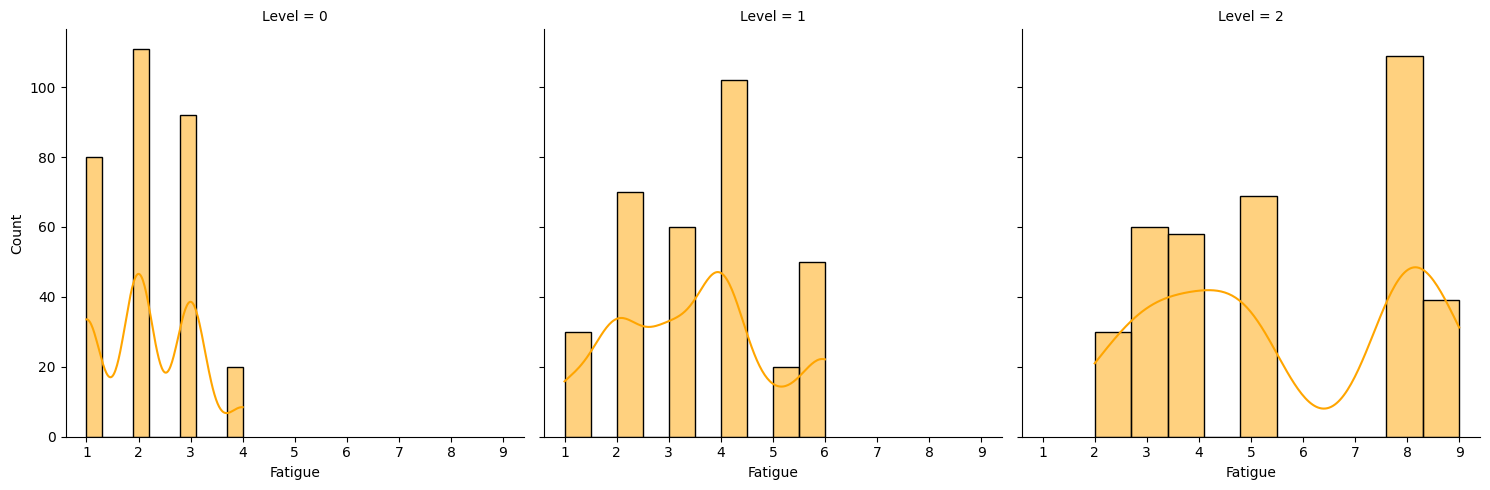

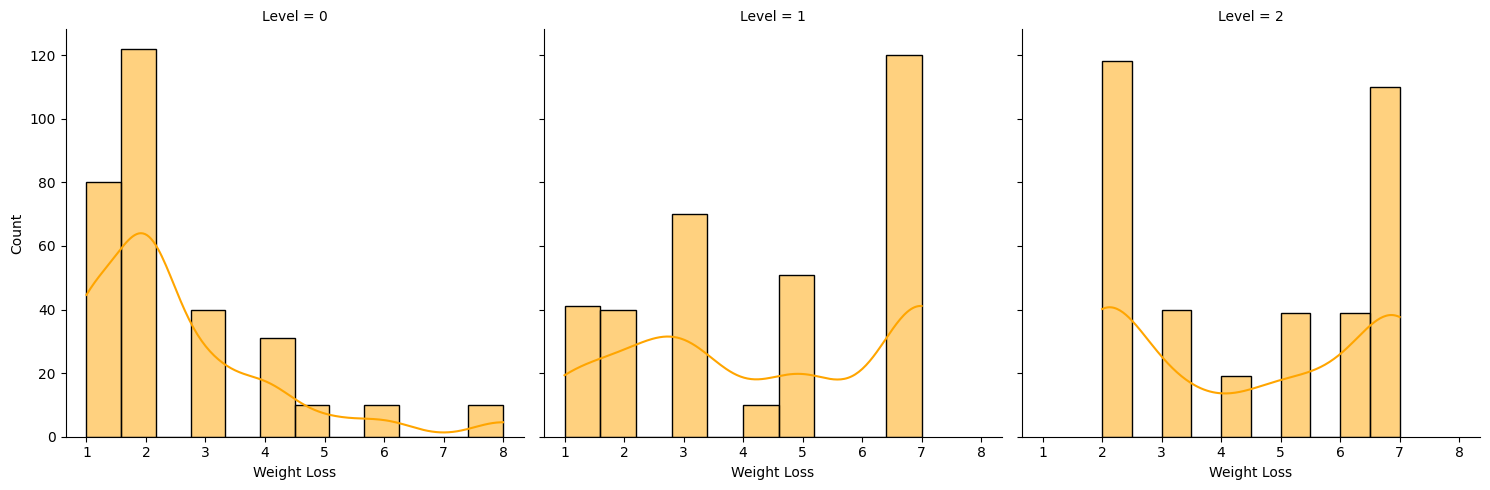

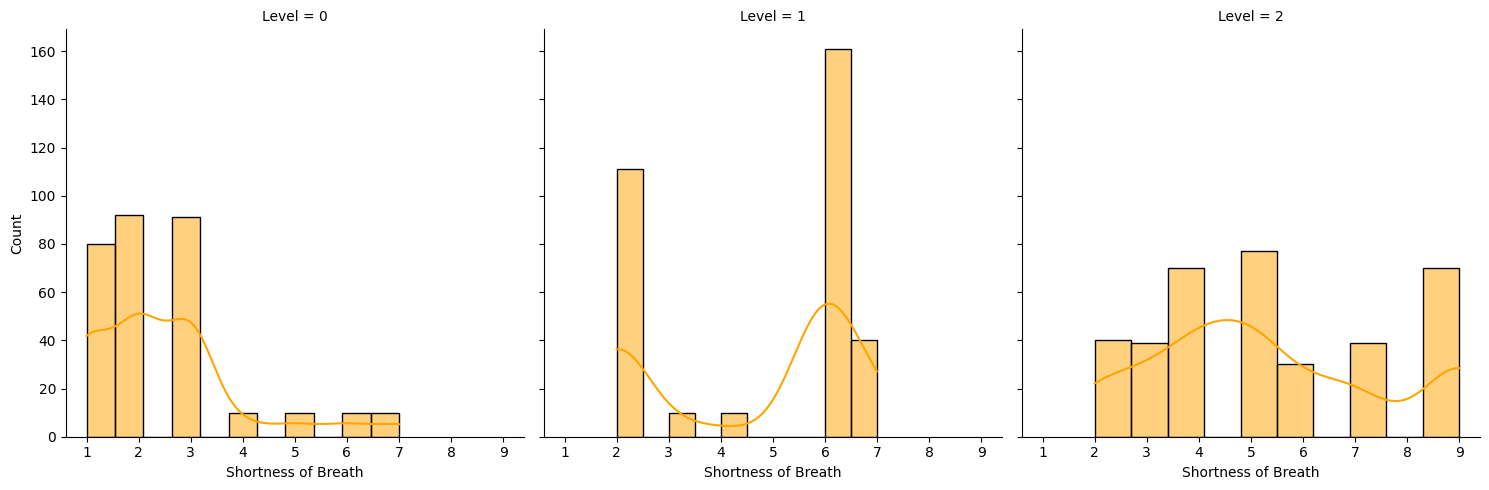

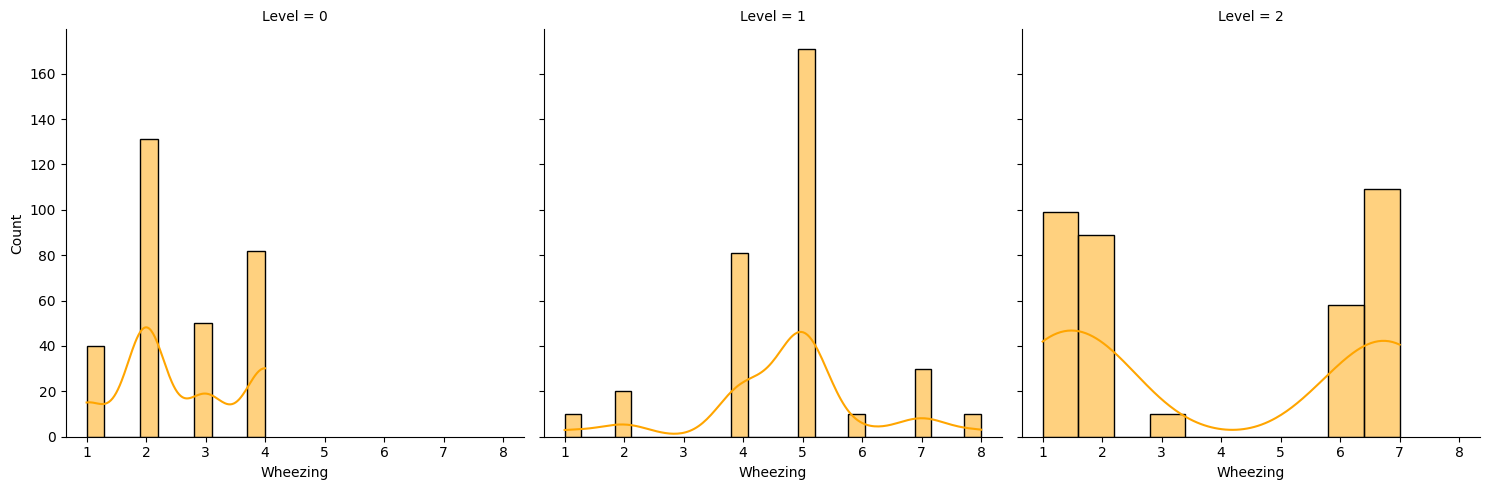

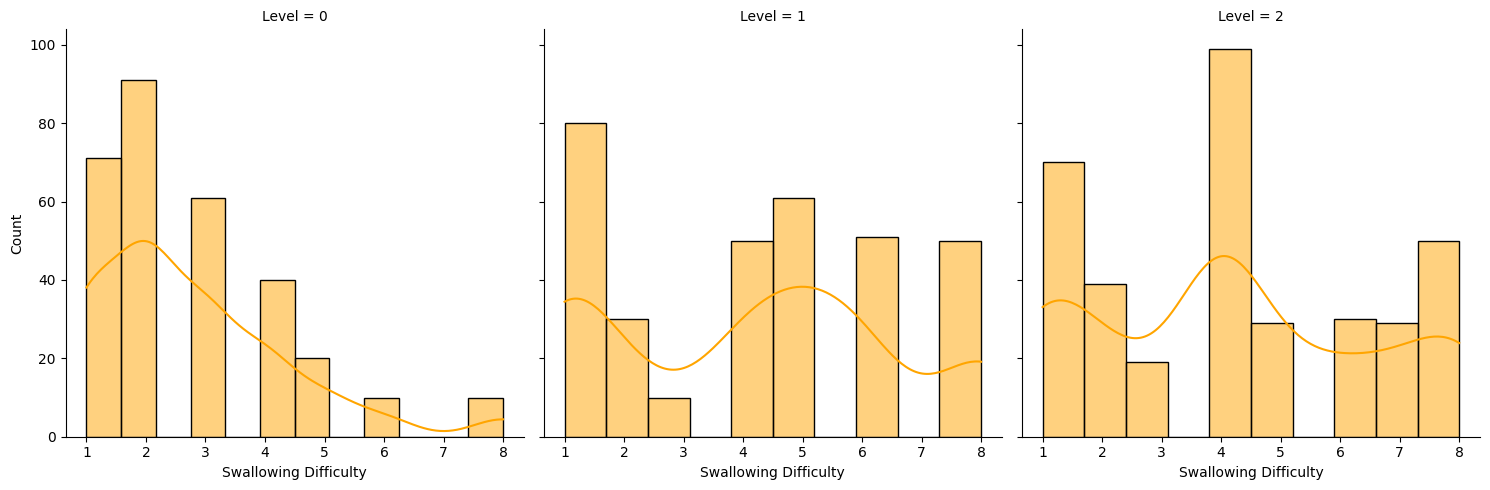

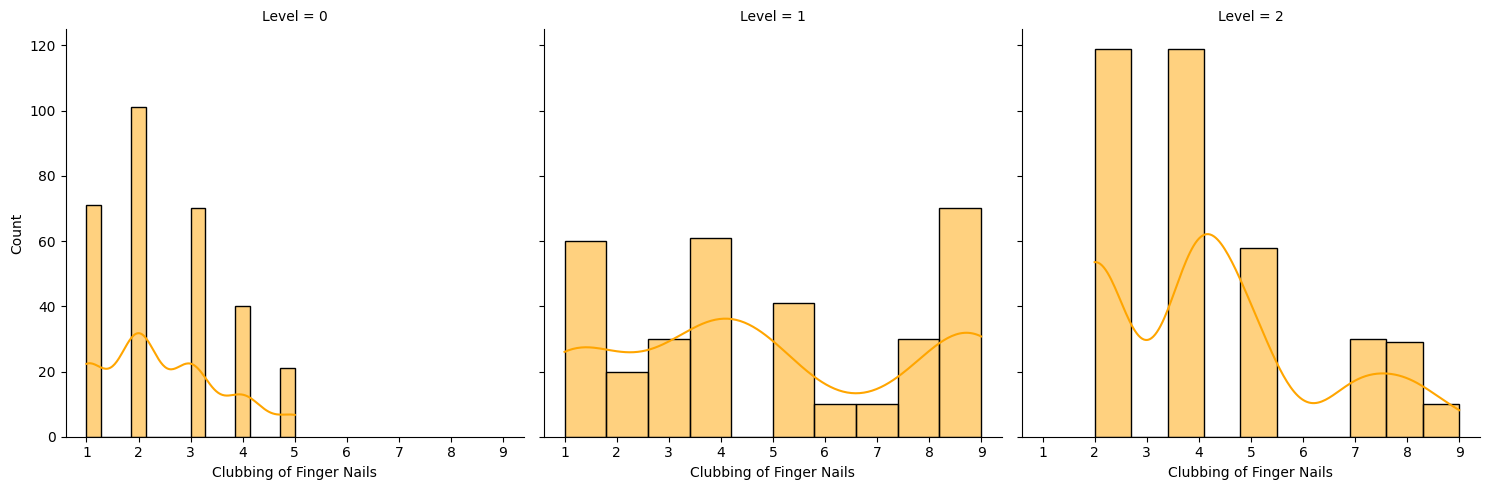

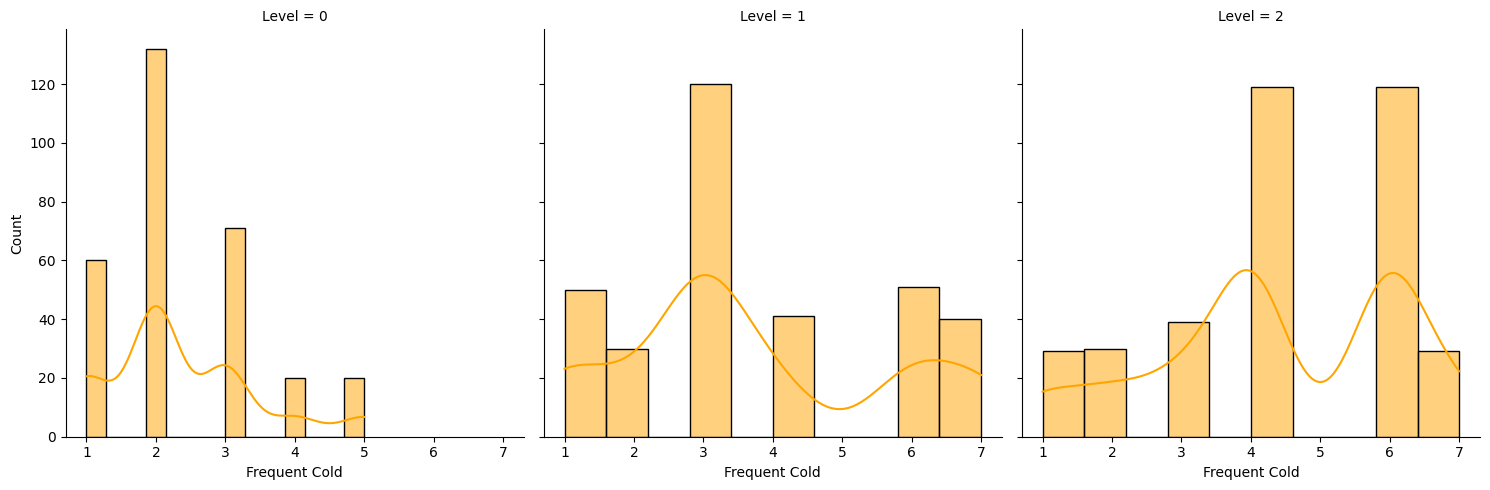

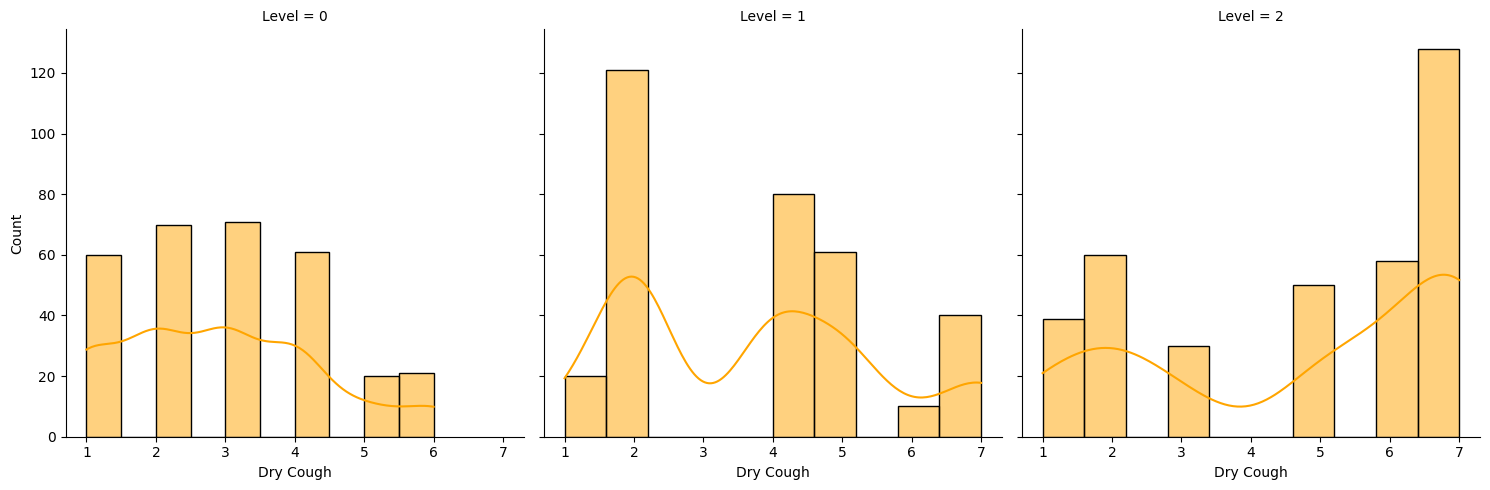

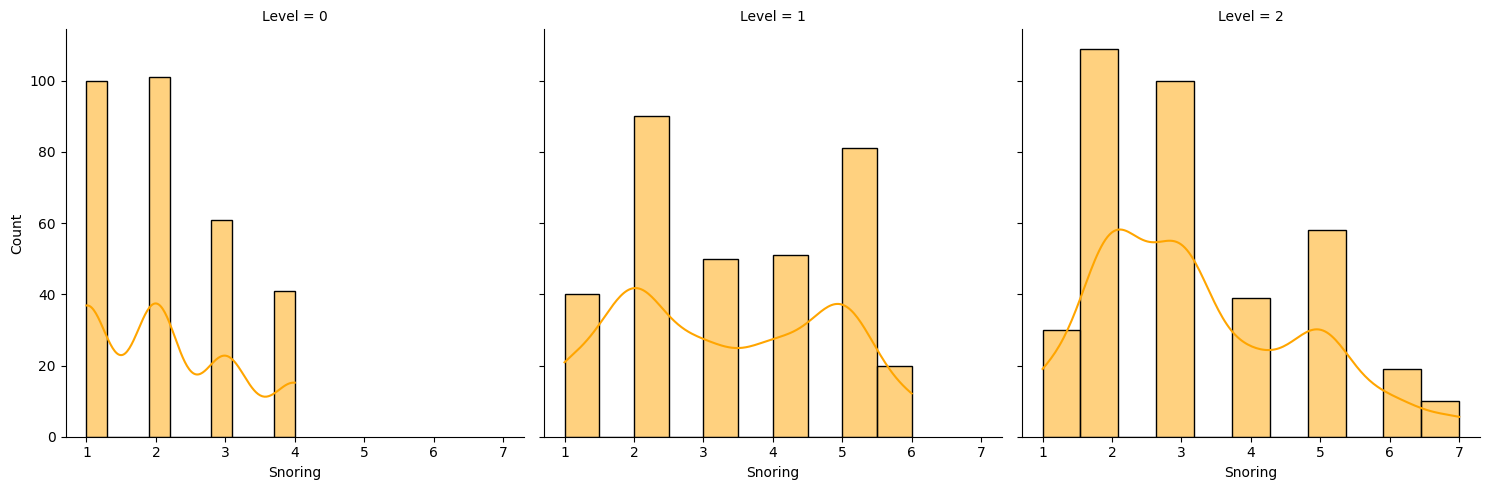

In [ ]:
for i in range(23):
    sea = sns.FacetGrid(data, col="Level", height=5)
    sea.map(sns.histplot, data.columns[i], color="orange", kde=True)
    plt.show()

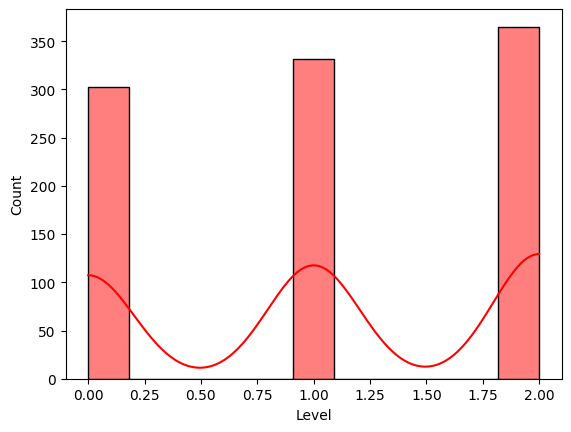

In [ ]:
sns.histplot(data['Level'], kde=True, color = 'red')
plt.show()

In [ ]:
y = data.pop('Level')
y.head()

,Level
0,0
1,1
2,2
3,2
4,2


In [ ]:
x = data
x.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('X train shape: ', x_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', x_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (800, 23)
Y train shape:  (800,)
X test shape:  (200, 23)
Y test shape:  (200,)


In [ ]:
params_DT ={
    'max_depth': [4],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'max_leaf_nodes': [5, 10],
    'random_state': [42]
}

In [ ]:
model_tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_DT, cv=4)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(x_train, y_train)

Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'random_state': 42}


DecisionTreeClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [ ]:
def performTest(y_pred):
    print("Test Data Metrics:")
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print( "Classification Report\n")
    print(classification_report(y_test, y_pred))

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])

    cm.plot( cmap='Oranges', ax=None, xticks_rotation='horizontal')
    print("\n")

Test Data Metrics:
Precision :  0.95
Recall :  0.95
Accuracy :  0.95
F1 Score :  0.95

 [[47  6  2]
 [ 0 63  0]
 [ 0  2 80]]


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.89      1.00      0.94        63
           2       0.98      0.98      0.98        82

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200



0.95 



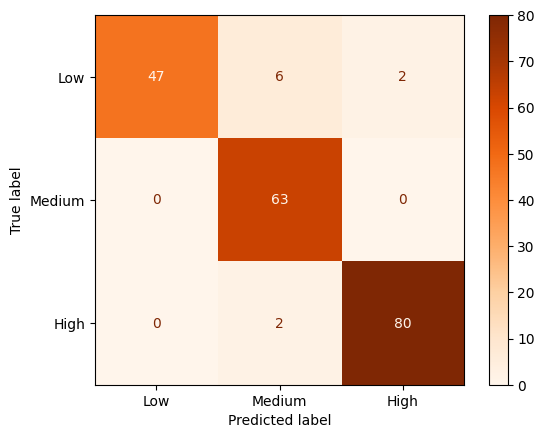

In [ ]:
train_predictions = model_dt.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Test
test_predictions = model_dt.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

performTest(test_predictions)
score_model_dt = model_dt.score(x_test, y_test)
print(score_model_dt,"\n")

In [ ]:
data=pd.read_csv('/content/cancer patient data sets.csv')
data.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
feature_names = data.columns[0:23]
viz = data.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


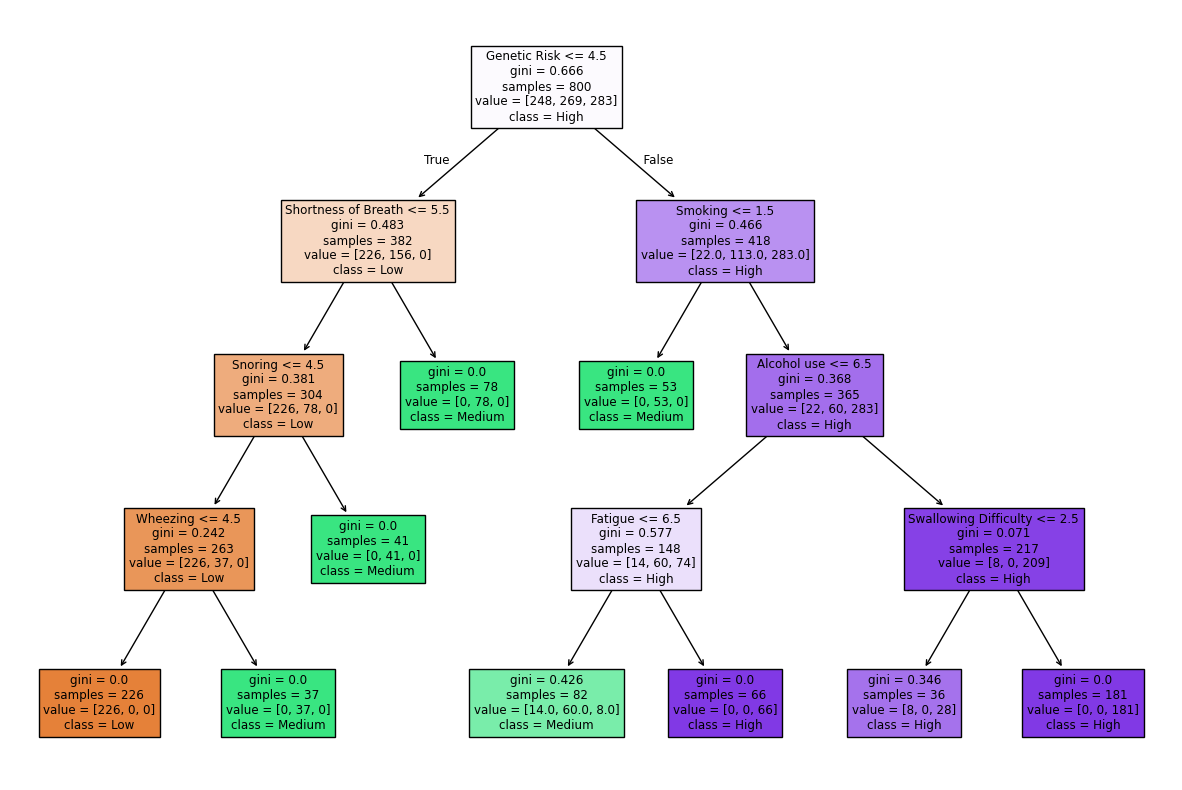

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_RF = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2],
    'criterion':['gini'],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3],
    'random_state' : [42],
    'max_samples': [0.4]

}

In [ ]:
model_tuning = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RF, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(x_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


RandomForestClassifier(max_depth=2, max_samples=0.4, min_samples_leaf=2,
                       random_state=42)

Test Data Metrics:
Precision :  0.98
Recall :  0.98
Accuracy :  0.98
F1 Score :  0.98

 [[53  0  2]
 [ 0 62  1]
 [ 0  1 81]]


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.98      0.98      0.98        63
           2       0.96      0.99      0.98        82

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200





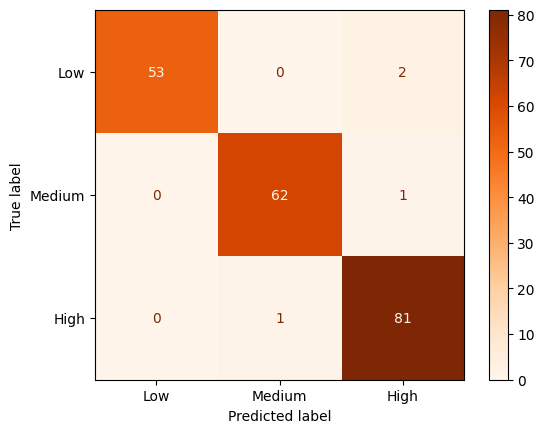

In [ ]:
test_predictions = model_rf.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')
performTest(test_predictions)

In [ ]:
data=pd.read_csv('/content/cancer patient data sets.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


KeyError: 'LUNG_CANCER'